# 課程目標:
利用神經網路的加法減法數學式來說明梯度下降
# 範例重點:
透過網路參數(w, b)的更新可以更容易理解梯度下降的求值過程
matplotlib: 載入繪圖的工具包 random, numpy: 載入數學運算的工具包

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np
import csv

%matplotlib inline

# ydata = b + w * xdata
給定曲線的曲線範圍

In [2]:
# 給定初始的data
x_data = [ 338., 333., 328., 207., 226., 25., 179.,  60., 208.,  606.]
y_data = [ 640., 633., 619., 393., 428., 27., 193.,  66., 226., 1591.]

In [3]:
#給定神經網路參數:bias 跟weight
x = np.arange(-200,-100,1) #給定bias
y = np.arange(-5,5,0.1) #給定weight

In [4]:
z = np.zeros((len(x),len(y)))
X,Y = np.meshgrid(x,y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        z[j][i] = 0
        for n in range(len(x_data)):
            #Calculate MSE
            z[j][i] = z[j][i] + (y_data[n] - b - w*x_data[n]) ** 2
        z[j][i] = z[j][i] / len(x_data)

In [5]:
# ydata = b + w*xdata
b = - 120
w = -4
lr = 0.000001
iteration = 100000

b_history = [b]
w_history = [w]

lr_b = 0.0
lr_w = 0.0

在微積分裡面，對多元函數的參數求∂偏導數，把求得的各個參數的偏導數以向量的形式寫出來，就是梯度。 比如函數f(x), 對x求偏導數，求得的梯度向量就是(∂f/∂x),簡稱grad f(x)或者▽f (x)。

In [6]:
'''
Loss = (實際ydata – 預測ydata)
Gradient = -2*input * Loss 
調整後的權重 = 原權重 – Learning * Gradient
'''

for i in range(iteration):
    b_grad = 0
    w_grad = 0
    
    for n in range(len(x_data)):
        b_grad = b_grad - 2.0 * (y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0 * (y_data[n] - b - w*x_data[n])*x_data[n]
    
    #lr_b = lr_b + b_grad**2
    #lr_w = lr_w + w_grad**2
    
    #update parameters
    b = b - lr * b_grad
    w = w - lr * w_grad
    
    b_history.append(b)
    w_history.append(w)

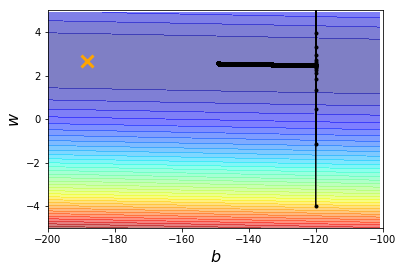

In [7]:
# plot the figure
plt.contourf(x,y,z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()

# 課程目標:
利用神經網路的加法減法數學式來說明梯度下降 <br />
# 範例重點:
透過網路參數(w, b)的更新可以更容易理解梯度下降的求值過程<br />
# 梯度 Gradient
在微積分裡面，對多元函數的參數求∂偏導數，把求得的各個參數的偏導數以向量的形式寫出來，就是梯度。<br />
<br />
比如函數f(x), 對x求偏導數，求得的梯度向量就是(∂f/∂x),簡稱grad f(x)或者▽f (x)<br />
<br />

# 梯度下降法
給定起始點與目標函數的一階導函數(偏導數)，求在epochs次迭代中x的更新值<br />
<br />
y = w*x (為了計算方便, 假設 w=x), 所以 y=(x)^2,<br />
<br />
func(x) = y=(x)^2<br />
<br />
一階導函數: dy/dw=2*x, df = dy/dw<br />
<br />
v表示w要改變的幅度v = - (dL/dw)* lr<br />
<br />
w <-- w + v (w <-- w-lr*df)<br />
<br />
考慮bias: y = b + w*x (set b=0)

[3.         2.88       2.7624     2.647152   2.53420896 2.42352478
 2.31505429 2.2087532  2.10457814 2.00248657 1.90243684 1.8043881
 1.70830034 1.61413434 1.52185165 1.43141462 1.34278632 1.2559306
 1.17081199 1.08739575 1.00564783]


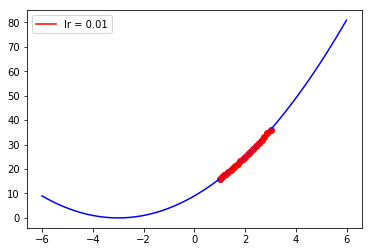

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#objective function
def func(x):
    return (x+3)**2

def dfunc(x):
    return 2*(x+3)

def GD(w_init, df, epochs, lr):
    '''
     梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param w_init: w的init value    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置  
    '''
    xs = np.zeros(epochs+1)
    x = w_init
    xs[0] = x
    for i in range(epochs):
        dx = dfunc(x)
        x = x - dx*lr
        xs[i+1] = x
    return xs


#initial weighting
w_init = 3
#iteration cycles
epochs = 20
#learning rate
lr = 0.01
#gradient descent
x = GD(w_init, dfunc, epochs, lr)
print(x)

#Plot the curve
color = 'r'

t = np.arange(-6,6,0.01)
plt.plot(t, func(t), c = 'b')
plt.plot(x, func(x), c = color, label = f'lr = {lr}')
plt.scatter(x, func(x), c = color)
plt.legend()
plt.show()

# 學習率對梯度下降法的影響
學習率較小時，收斂到正確結果的速度較慢。 學習率較大時，容易在搜索過程中發生震盪。

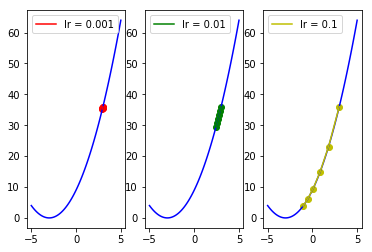

In [9]:
line_x = np.linspace(-5,5,100)
line_y = func(line_x)
plt.figure('Gradient Desent : Learning Rate')

w_init = 3
epochs = 5
x = w_init
lr = [0.001, 0.01, 0.1]
color = ['r', 'g', 'y']
size = np.ones(epochs+1) * 10
size[-1] = 70
for i in range(len(lr)):
    x = GD(w_init, dfunc, epochs, lr[i])
    plt.subplot(1,3, i+1)
    plt.plot(line_x, line_y, c = 'b')
    plt.plot(x, func(x), c = color[i], label = f'lr = {lr[i]}')
    plt.scatter(x, func(x), c = color[i])
    plt.legend()
plt.show()

# Result
學習率較大時，容易在搜索過程中發生震盪，而發生震盪的根本原因無非就是搜索的步長邁的太大了 如果讓能夠lr隨著迭代週期不斷衰減變小，那麼搜索時邁的步長就能不斷減少以減緩震盪學習率衰減因子由此誕生<br />
<br />

# 學習率衰減公式
lr_i = lr_start 1.0 / (1.0 + decay i)<br />
<br />
其中lr_i為第一迭代i時的學習率，lr_start為原始學習率，decay為一個介於[0.0, 1.0]的小數。從公式上可看出：<br />
<br />
decay越小，學習率衰減地越慢，當decay = 0時，學習率保持不變。 decay越大，學習率衰減地越快，當decay = 1時，學習率衰減最快

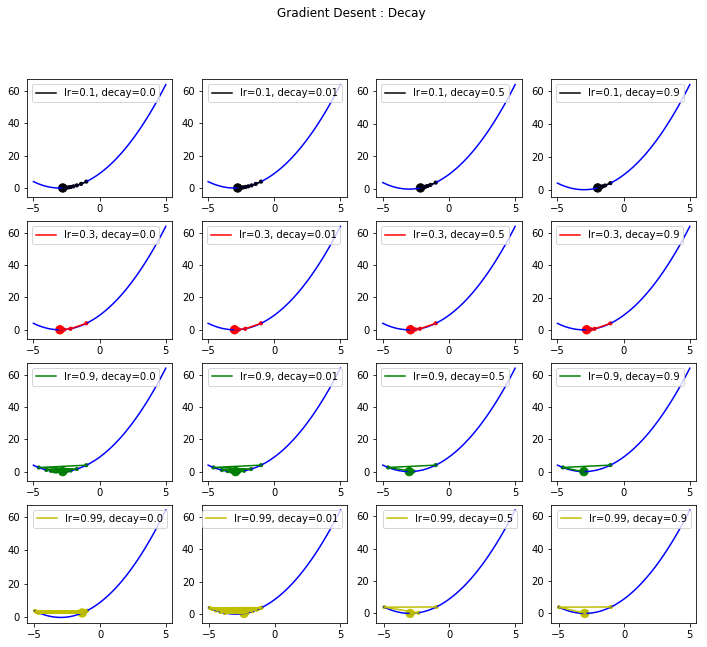

In [10]:
def GD_decay(w_init, df, epochs, lr, decay):
    xs = np.zeros(epochs + 1)
    x = w_init
    xs[0] = x
    for i in range(epochs):
        dx = df(x)
        lr_i = lr * 1.0 / (1 + decay * i)
        x = x - dx * lr_i
        xs[i+1] = x
    return xs

line_x = np.linspace(-5,5,100)
line_y = func(line_x)

x_start = -1
epochs = 10
lr = [0.1, 0.3, 0.9, 0.99]
decay = [0.0, 0.01, 0.5, 0.9]

color = ['k', 'r', 'g', 'y']

row = len(lr)
col = len(decay)

size = np.ones(epochs+1) * 10
size[-1] = 70
plt.figure(figsize = (12,10))
plt.suptitle('Gradient Desent : Decay')

for i in range(row):
    for j in range(col):
        x = GD_decay(x_start, dfunc, epochs, lr[i], decay[j])
        plt.subplot(row, col, i * col + j + 1)
        plt.plot(line_x, line_y, color  = 'b')
        plt.plot(x, func(x), c = color[i], label = f'lr={lr[i]}, decay={decay[j]}')
        plt.scatter(x,func(x),c = color[i], s = size)
        plt.legend(loc=0)
plt.show()


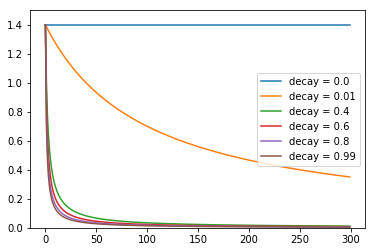

In [11]:
line_x = np.linspace(-5,5,100)
line_y = func(line_x)
plt.figure('Gradient Desent : Decay')

lr = 1.4
iterations = np.arange(300)
decay = [0.0, 0.01, 0.4, 0.6, 0.8, 0.99]
for i in range(len(decay)):
    decay_lr = lr * 1.0 / (1.0 + decay[i] * iterations)
    plt.plot(iterations, decay_lr, label = f'decay = {decay[i]}')

plt.ylim([0, 1.5])
plt.legend(loc = 'best')
plt.show()

# Result
衰減越大，學習率衰減地越快。 衰減確實能夠對震盪起到減緩的作用 <br />
<br />

# Momentum (動量)
如何用“動量”來解決:<br />
<br />
(1)學習率較小時，收斂到極值的速度較慢。<br />
<br />
(2)學習率較大時，容易在搜索過程中發生震盪。<br />
<br />
當使用動量時，則把每次w的更新量v考慮為本次的梯度下降量 (-dx*lr), 與上次w的更新量v乘上一個介於[0, 1]的因子momentum的和<br />
<br />
w ← w − α ∗ dw (x沿負梯度方向下降)<br />
<br />
v = ß ∗ v − α ∗ d w <br />
<br />
w ← w + v<br />
<br />
(ß 即momentum係數，通俗的理解上面式子就是，如果上一次的momentum（即ß ）與這一次的負梯度方向是相同的，那這次下降的幅度就會加大，所以這樣做能夠達到加速收斂的過程<br />
<br />
如果上一次的momentum（即ß ）與這一次的負梯度方向是相反的，那這次下降的幅度就會縮減，所以這樣做能夠達到減速收斂的過程

# 作業目標: 
了解數學式與利用超參數調整求導梯度下降的過程 <br />
# 作業重點:
(1)dfunc 是 func 偏微分的公式，X^2 偏微分等於 2 * X，可以同時改變 func、dfunc 內容<br />
<br />
(2)調整其它 Hyperparameters: w_init、epochs、lr、decay、momentom測試逼近的過程

In [12]:
def objFunc(x):
    return (x+5)**2
def dobjFunc(x):
    return 2*(x+5)

[ 3.         -1.8        -3.72       -4.488      -4.7952     -4.91808
 -4.967232   -4.9868928  -4.99475712 -4.99790285 -4.99916114 -4.99966446
 -4.99986578 -4.99994631 -4.99997853 -4.99999141 -4.99999656 -4.99999863
 -4.99999945 -4.99999978 -4.99999991]


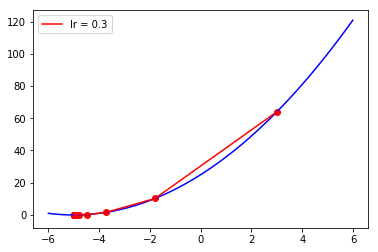

In [13]:
def GradientDesent(w_init, df, epochs, lr):
    xs = np.zeros(epochs + 1)
    x = w_init
    xs[0] = x
    for i in range(epochs):
        dx = df(x)
        x = x - lr * dx
        xs[i+1] = x
    return xs

#initial weighting
w_init = 3
#iteration
epochs = 20
#learning rate
lr = 0.3
#gradient desent
x = GradientDesent(w_init, dobjFunc, epochs, lr)
print(x)

t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, objFunc(t), color = 'b')
plt.plot(x, objFunc(x), color = 'r', label = f'lr = {lr}')
plt.scatter(x, objFunc(x), color = 'r')
plt.legend()
plt.show()

# 學習率對梯度下降法的影響
學習率較小時，收斂到正確結果的速度較慢。 學習率較大時，容易在搜索過程中發生震盪。

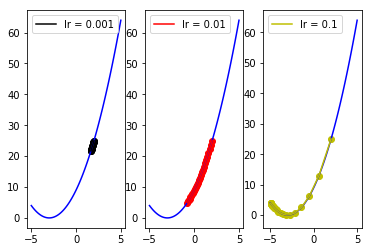

In [14]:
line_x = np.linspace(-5,5,100)
line_y = func(line_x)

w_init = 2
epochs = 25
lr = [0.001,0.01,0.1,]
color = ['k', 'r', 'y']
for i in range(len(lr)):
    x = GradientDesent(w_init, dobjFunc, epochs, lr[i])
    plt.subplot(1, 3 , i+1)
    plt.plot(line_x,line_y, c = 'b')
    plt.plot(x , func(x), c = color[i], label = f'lr = {lr[i]}' )
    plt.scatter(x, func(x), c = color[i])
    plt.legend()
plt.show()

# Result
學習率較大時，容易在搜索過程中發生震盪，而發生震盪的根本原因無非就是搜索的步長邁的太大了 如果讓能夠lr隨著迭代週期不斷衰減變小，那麼搜索時邁的步長就能不斷減少以減緩震盪學習率衰減因子由此誕生 <br />
<br />

# 學習率衰減公式
lr_i = lr_start 1.0 / (1.0 + decay i) <br />
<br />
其中lr_i為第一迭代i時的學習率，lr_start為原始學習率，decay為一個介於[0.0, 1.0]的小數。從公式上可看出：<br />
<br />
decay越小，學習率衰減地越慢，當decay = 0時，學習率保持不變。 decay越大，學習率衰減地越快，當decay = 1時，學習率衰減最快<br />

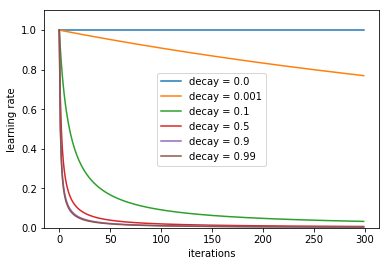

In [38]:
def GradientDesent_decay(w_init, df, epoch, lr, decay):
    
    xs =np.zeros(epoch+1)
    x = w_init
    xs[0] = x
    for i in range(epoch):
        dx = df(x)
        lr_i = lr * 1.0 / (1.0 + decay * 1.0)
        x = x - lr_i * dx
        xs[i+1] = x
    return xs

line_x = np.linspace(-5,5,100)
line_y = func(line_x)

lr = 1.0
iterations = np.arange(300)
decay = [0.0, 0.001, 0.1, 0.5, 0.9, 0.99]
for i in range(len(decay)):
    decay_lr = lr * 1.0 / (1.0 + decay[i] * iterations)
    plt.plot(iterations, decay_lr, label = f'decay = {decay[i]}')
plt.ylabel('learning rate')
plt.xlabel('iterations')
plt.ylim(0, 1.1)
plt.legend(loc = 'best')
plt.show()

# Result
衰減越大，學習率衰減地越快。 衰減確實能夠對震盪起到減緩的作用 <br />
<br />
# Momentum (動量)
如何用“動量”來解決:<br />
<br />
(1)學習率較小時，收斂到極值的速度較慢。<br />
<br />
(2)學習率較大時，容易在搜索過程中發生震盪。<br />
<br />
當使用動量時，則把每次w的更新量v考慮為本次的梯度下降量 (-dx*lr), 與上次w的更新量v乘上一個介於[0, 1]的因子momentum的和<br />
<br />
w ← w − α ∗ dw (x沿負梯度方向下降)<br />
<br />
v = ß ∗ v − α ∗ d w<br />
<br />
w ← w + v<br />
<br />
(ß 即momentum係數，通俗的理解上面式子就是，如果上一次的momentum（即ß ）與這一次的負梯度方向是相同的，那這次下降的幅度就會加大，所以這樣做能夠達到加速收斂的過程<br />
<br />
如果上一次的momentum（即ß ）與這一次的負梯度方向是相反的，那這次下降的幅度就會縮減，所以這樣做能夠達到減速收斂的過程

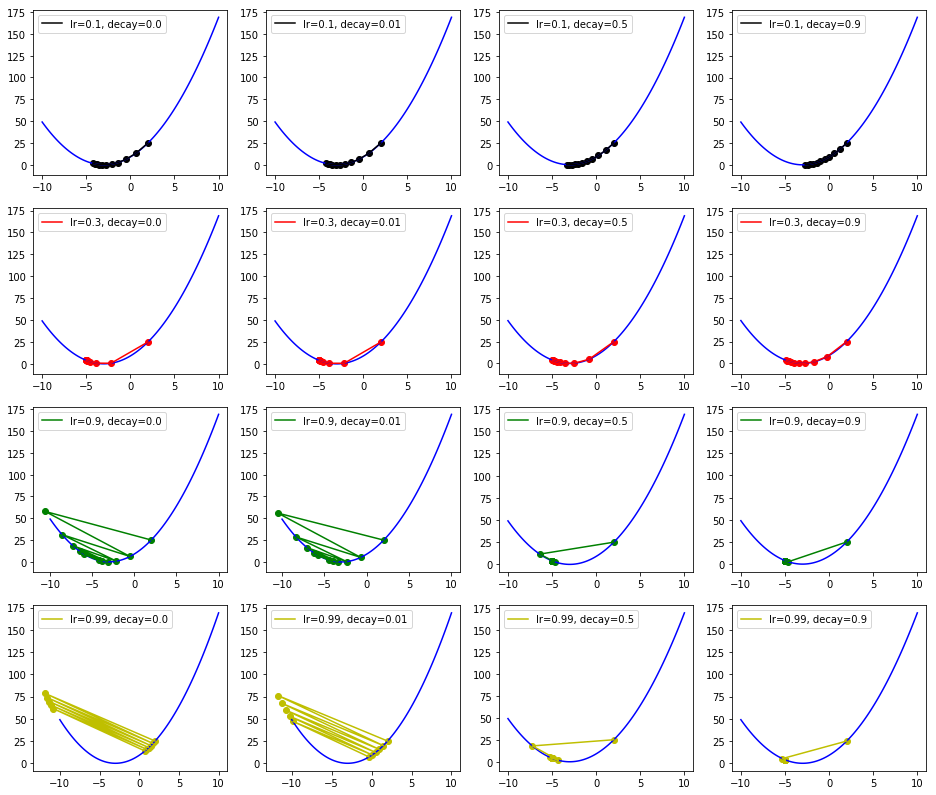

In [40]:
line_x = np.linspace(-10,10,100)
line_y = func(line_x)

w_init = 2
epochs = 10

lr = [0.1, 0.3, 0.9, 0.99]
decay = [0.0, 0.01, 0.5, 0.9]

color = ['k','r','g','y']
row = len(lr)
col = len(decay)
eopocs = 30
size = np.ones(epochs + 1) * 10
size[-1] = 70

plt.figure(figsize = (16,14))
for i in range(row):
    for j in range(col):
        plt.subplot(row,col, i * col + j + 1)
        x = GradientDesent_decay(w_init, dobjFunc, epochs, lr[i], decay[j])
        plt.plot(line_x, line_y, c = 'b')
        plt.plot(x, func(x), c = color[i], label = f'lr={lr[i]}, decay={decay[j]}' )
        plt.scatter(x, func(x), c = color[i])
        plt.legend(loc=0)
plt.show()


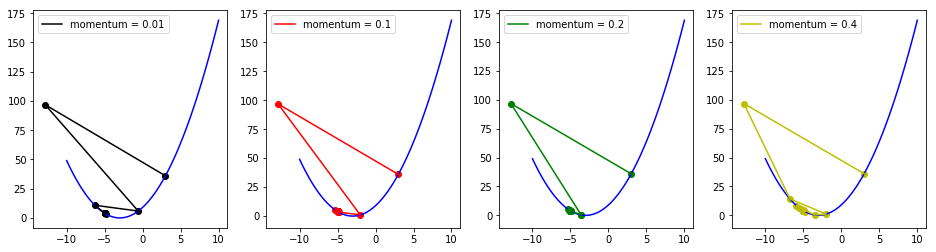

In [47]:
def GradientDesent_momentum(w_init, df, epochs, lr, decay, momentum):
    
    xs = np.zeros(epochs+1)
    x = w_init
    xs[0] = x
    v = 0
    for i in range(epochs):
        dx = df(x)
        lr_i = lr * 1.0 / (1.0 + decay * i)
        v = momentum * v - lr_i * dx
        x = x + v
        xs[i+1] = x
        
    return xs


w_init = 3
epochs = 30
lr = 0.99
decay = 0.25
momentum = [0.01, 0.1,0.2,0.4]
plt.figure(figsize = (16,4))
for i in range(len(momentum)):
    plt.subplot(1,4,i+1)
    x = GradientDesent_momentum(w_init, dobjFunc, epochs, lr, decay, momentum[i])
    plt.plot(line_x, line_y, c = 'b')
    plt.plot(x, func(x), c = color[i], label = f'momentum = {momentum[i]}')
    plt.scatter(x,func(x), c= color[i])
    plt.legend(loc=0)
plt.show()
